In [101]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import math


px0=25; 
x0=0; 

py0=0; 
y0=1;

pz0=0; 
z=0; 

tfin=100*(2*np.pi*np.sqrt(2*px0)); 
tstep=0.01;

Nt=np.floor(tfin/tstep);
Nt=np.int_(Nt)

abeta=px0*y0/np.sqrt(2*px0); 
print("abeta is "+str(abeta)+"\n");
wr=2*px0*px0/np.sqrt(2*px0); 
print("wr is "+str(wr)+"\n   or "+str(wr*1.24/0.8)+" eV\n");
wc=3*abeta*px0*px0/np.sqrt(2*px0); 
print("wc is "+str(wc)+"\n   or "+str(wc*1.24/0.8)+" eV\n");
print("Nt is " +str(Nt)+"\n");
def SaveAsH5(rank):
    
    tt = np.arange(Nt)*tstep
    
    py = -np.sqrt(px0/2)*y0*np.sin(tt/np.sqrt(2*px0))
    pz =                  0*np.sin(tt/np.sqrt(2*px0))
    px =  np.sqrt(px0*px0-1-py*py)

    xx = np.arange(Nt)*np.sqrt(1-1/px0/px0)*tstep
    yy = y0*np.cos(tt/np.sqrt(2*px0))
    zz =  0*np.cos(tt/np.sqrt(2*px0))
        
    
    f = h5.File('Traj_%d_.h5'%rank,'w')
    for p in np.arange(1):
        grp = f.create_group('%d'%p)
        dset = grp.create_dataset("xx", (Nt,),data=xx)
        dset = grp.create_dataset("yy", (Nt,),data=yy)
        dset = grp.create_dataset("zz", (Nt,),data=zz)
        dset = grp.create_dataset("px", (Nt,),data=px)
        dset = grp.create_dataset("py", (Nt,),data=py)
        dset = grp.create_dataset("pz", (Nt,),data=pz)
        dset = grp.create_dataset("weight",(1,),data=1.0) #how many real unit charges it represents 
        dset = grp.create_dataset("start", (1,),data=0) # starting time of trajectory
         
    f.close()

abeta is 3.5355339059327373

wr is 176.7766952966369
   or 274.00387770978716 eV

wc is 937.4999999999999
   or 1453.1249999999995 eV

Nt is 444288



In [102]:
for i in range(4):
     SaveAsH5(i)

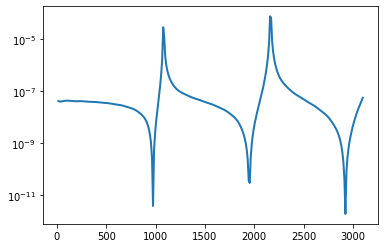

array([  15.49749977,   25.81188925,   36.12627873,   46.4406682 ,
         56.75505768,   67.06944716,   77.38383664,   87.69822612,
         98.0126156 ,  108.32700507,  118.64139455,  128.95578403,
        139.27017351,  149.58456299,  159.89895247,  170.21334195,
        180.52773142,  190.8421209 ,  201.15651038,  211.47089986,
        221.78528934,  232.09967882,  242.41406829,  252.72845777,
        263.04284725,  273.35723673,  283.67162621,  293.98601569,
        304.30040516,  314.61479464,  324.92918412,  335.2435736 ,
        345.55796308,  355.87235256,  366.18674204,  376.50113151,
        386.81552099,  397.12991047,  407.44429995,  417.75868943,
        428.07307891,  438.38746838,  448.70185786,  459.01624734,
        469.33063682,  479.6450263 ,  489.95941578,  500.27380525,
        510.58819473,  520.90258421,  531.21697369,  541.53136317,
        551.84575265,  562.16014212,  572.4745316 ,  582.78892108,
        593.10331056,  603.41770004,  613.73208952,  624.04647

In [103]:
filename = 'Synchrotron_00004_.h5'
hf = h5.File(filename, 'r')
Ax = np.square(np.array(hf['Ax_R']))+np.square(np.array(hf['Ax_I']))
Ay = np.square(np.array(hf['Ay_R']))+np.square(np.array(hf['Ay_I']))
Az = np.square(np.array(hf['Az_R']))+np.square(np.array(hf['Az_I']))
eng = np.array(hf['Energy[eV]'])
I = Ay+Ax+Az
I.shape
fig, ax = plt.subplots()

ax.plot(eng, (I[:,0,0,0]), linewidth=2.0)
ax.set_yscale('log')
plt.show()
eng